## Pyzbar

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2

In [2]:
from shapely.geometry import Polygon
import csv
from pathlib import Path
import os

def calculate_iou(markup, answer):
    sum_iou = 0.0
    for (k, v) in answer.items():
        a = Polygon(v[1])
        b = Polygon(markup[k][1])
        iou = a.intersection(b).area / a.union(b).area
        sum_iou += iou
    return sum_iou / len(markup)
    
    
def read_file(path):
    markup = {}
    with open(path, 'r', encoding='utf-16') as fd:
        rd = csv.reader(fd)
        next(rd)
        for row in rd:
            id = row[0]
            value = row[1]
            points = [(int(row[i]), int(row[i + 1])) for i in range(2, 10, 2)]
            markup[id] = [value, points]
    return markup


def calculate_accuracy(markup, answer):
    counter = 0
    for (k, v) in answer.items():
        markup_value = markup[k][0]
        if markup_value == v[0]:
            counter += 1
    return counter / len(markup)


ACCURACY_WEIGHT = 0.65
IOU_WEIGHT = 0.35


def evaluate(gt_path, answer_path):
    print(f"Checking answer ({answer_path}) against markup({gt_path})")
    markup = read_file(gt_path)
    answer = read_file(answer_path)
    recognition_accuracy = calculate_accuracy(markup, answer)
    print("recognition_accuracy=", recognition_accuracy)
    detection_iou = calculate_iou(markup, answer)
    print("detection_iou=", detection_iou)
    score = ACCURACY_WEIGHT * recognition_accuracy + IOU_WEIGHT * detection_iou
    print("score=", score)

In [3]:
df = pd.read_csv("D:\BARCODES_UNPACKED\Train\markup.csv", encoding="utf_16_le")
df.head()

fc272e4092ccb147a31e66bc1d10fbfb.png  3601514743345  538  248  1590   225  \
0  8cde8cb1b54bca37c9347baf74157d22.png  7000001062307  372  433   360  1289   
1  70a9be0887eae17eabd70c8e607f963f.png  2250001407126  408  230  1224   229   
2  a029e49dff95a15d2cd396d8f62220c8.png    10101427156  335  149  1005   155   
3  82ff01909b6d215170dfc26c7be43074.png  2400745402226  469  237  1388   260   
4  22487c491adb42f1c48e630c0af253fa.png  2670348154611  347   93  1021    93   

   1597   663  532  676  \
0   124  1293  147  431   
1  1224   688  414  683   
2  1005   438  335  447   
3  1392   712  464  696   
4  1021   279  340  275   

  10101011110001101011001101110010110011010001101010100010010111001000010100001010111001001110101  
0  1010001101010011100011010100111000110101100110...                                               
1  1010010011011000101001110100111000110101100110...                                               
2  1010001101001100100011010011001000110100110010...                                               
3  1010100011000110101001110010001010001101110010...                                               
4  1010101111011101101001110100001010001100010010...

In [4]:
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        print(dirname + "/" + filename)

D:/BARCODES_UNPACKED/Test/Test/Images/00f3d3d8b60ef559304ff51cadaf4fb1.png
D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png
D:/BARCODES_UNPACKED/Test/Test/Images/065c4a67725752b09302b0a6a5ad3971.png
D:/BARCODES_UNPACKED/Test/Test/Images/099574d0f797fe2519686fd1e724ebf3.png
D:/BARCODES_UNPACKED/Test/Test/Images/10c9065a00b9bea9b741208b2679cf76.png
D:/BARCODES_UNPACKED/Test/Test/Images/1105913212699e2e8a558191113acbd7.png
D:/BARCODES_UNPACKED/Test/Test/Images/144b3c6678312a8dddaaa713c9f56a71.png
D:/BARCODES_UNPACKED/Test/Test/Images/157a4b17084b43ef3b572dd7267e76d0.png
D:/BARCODES_UNPACKED/Test/Test/Images/16cd16966b3339632b8dbce36225237c.png
D:/BARCODES_UNPACKED/Test/Test/Images/19b01a2c6deeda40dbbdc6c54b7b6497.png
D:/BARCODES_UNPACKED/Test/Test/Images/1b40467bc7b1623a8c957719fcf61b54.png
D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png
D:/BARCODES_UNPACKED/Test/Test/Images/2927ce6ceccad5fab23e5b332894c5e1.png
D:/BARCODES_UNPACKED/Test

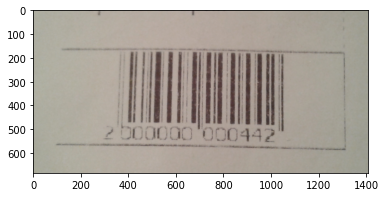

In [148]:
from PIL import Image
from pyzbar.pyzbar import decode, ZBarSymbol

image = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/fedcc45b69bb6c40c4599bbb499ee365.png")
plt.imshow(image)

In [149]:
res = decode(image, symbols=[ZBarSymbol.EAN13])
res

[Decoded(data=b'2000000000442', type='EAN13', rect=Rect(left=355, top=318, width=697, height=152), polygon=[Point(x=355, y=465), Point(x=1052, y=470), Point(x=1052, y=320), Point(x=715, y=318), Point(x=695, y=321), Point(x=359, y=385)], quality=31, orientation='UP')]

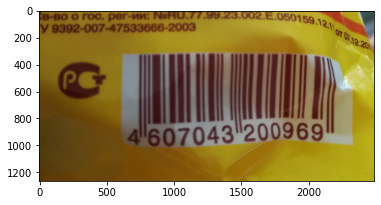

In [192]:
image = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png")
plt.imshow(image)

In [193]:
res = decode(image, symbols=[ZBarSymbol.EAN13])
res

[Decoded(data=b'4607043200969', type='EAN13', rect=Rect(left=743, top=496, width=1463, height=287), polygon=[Point(x=743, y=659), Point(x=743, y=775), Point(x=744, y=779), Point(x=1453, y=783), Point(x=1501, y=782), Point(x=2190, y=764), Point(x=2191, y=752), Point(x=2203, y=586), Point(x=2206, y=542), Point(x=2206, y=536), Point(x=2199, y=502), Point(x=2197, y=496), Point(x=746, y=499), Point(x=744, y=531)], quality=104, orientation='UP')]

In [194]:
int(res[0][0])

4607043200969

In [199]:
res[0].rect

Rect(left=743, top=496, width=1463, height=287)

In [201]:
x, y, width, height = res[0].rect
print(x, y, width, height)

743 496 1463 287


In [11]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

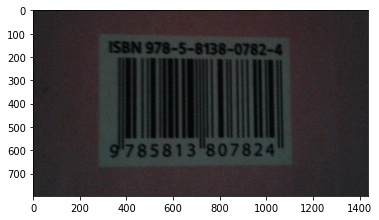

D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png


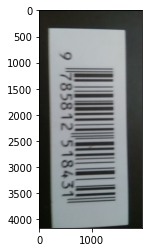

D:/BARCODES_UNPACKED/Test/Test/Images/37de452d05e9ecbed02a3966a1fa71b2.png


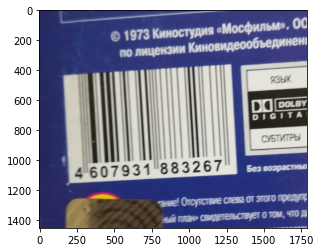

D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png


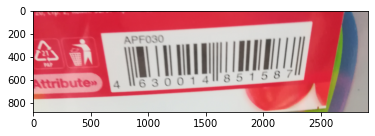

D:/BARCODES_UNPACKED/Test/Test/Images/58a2f243e9fdebb829c9aa954c1ced6a.png


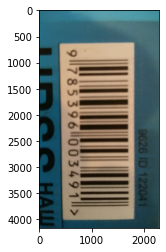

D:/BARCODES_UNPACKED/Test/Test/Images/710eb9174efd4f943aa75c79e89a5bdc.png


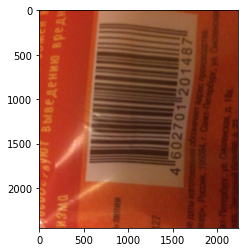

D:/BARCODES_UNPACKED/Test/Test/Images/7e56f424b1cd4515c744543907e89663.png


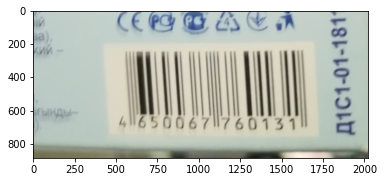

D:/BARCODES_UNPACKED/Test/Test/Images/8119dd3a93dbf4e27cc3ba7262bd311e.png


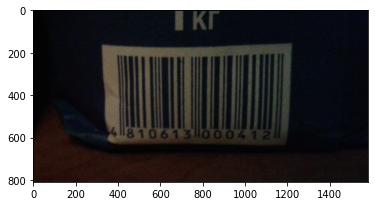

D:/BARCODES_UNPACKED/Test/Test/Images/88cb4b415dac218527ecc74dc6df522c.png


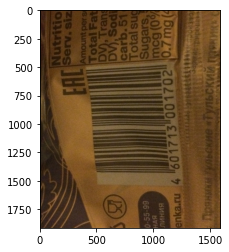

D:/BARCODES_UNPACKED/Test/Test/Images/97b2e27686dbb54b20cfbf9696d430f1.png


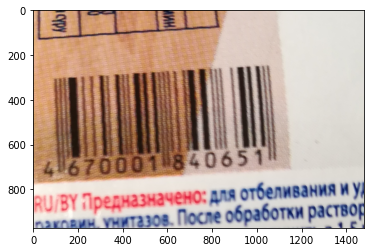

D:/BARCODES_UNPACKED/Test/Test/Images/a417bfe1b2ea0e2ac15c92db789ff500.png


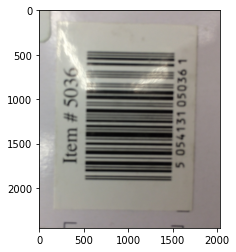

D:/BARCODES_UNPACKED/Test/Test/Images/ab30ca615e3fb75d5bcbf0b1aa663f69.png


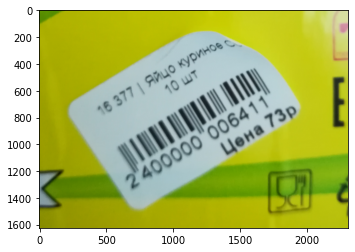

D:/BARCODES_UNPACKED/Test/Test/Images/ad33d4cb49ac5a476768dd96b6eed78e.png


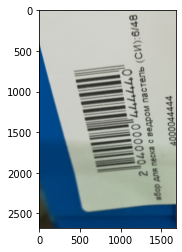

D:/BARCODES_UNPACKED/Test/Test/Images/afd709c701704672c18db8d2684e0ae6.png


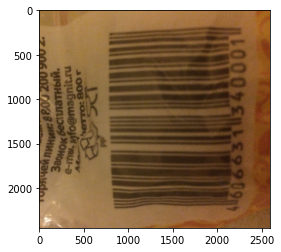

D:/BARCODES_UNPACKED/Test/Test/Images/bf547f52301ee51df5faf1a6dc678740.png


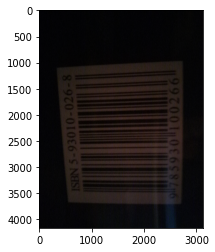

D:/BARCODES_UNPACKED/Test/Test/Images/c683d3627b6766ef1acd6efd52316be8.png


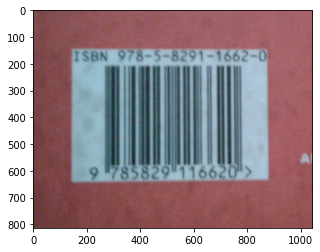

D:/BARCODES_UNPACKED/Test/Test/Images/cd82f250fa1ff45ae2eada5d91ed90a2.png


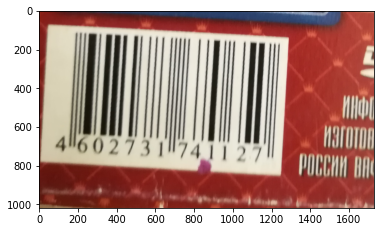

D:/BARCODES_UNPACKED/Test/Test/Images/d0adf4fa6ec14c14d53e210a9a279e75.png


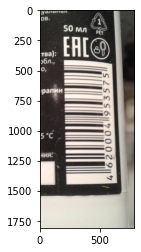

D:/BARCODES_UNPACKED/Test/Test/Images/d28f09879d22495e4ec234a5287a6c30.png


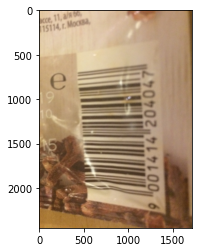

D:/BARCODES_UNPACKED/Test/Test/Images/d7d7c5f9109aa31aff407eeab054bfc7.png


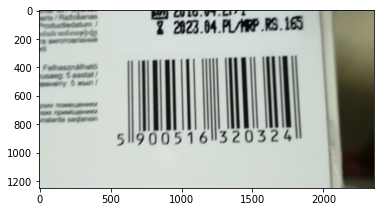

D:/BARCODES_UNPACKED/Test/Test/Images/dc706a5a1d6f8987b93bca7c2e737746.png


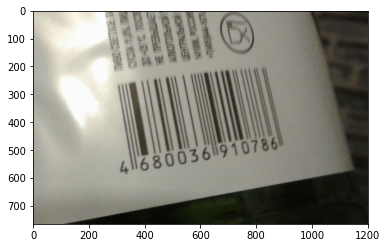

D:/BARCODES_UNPACKED/Test/Test/Images/e083bf4d3c80b00698abdf7b4e769a8c.png


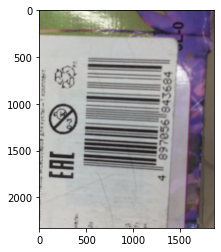

D:/BARCODES_UNPACKED/Test/Test/Images/e5a9138a94f2ed782a77f2ef4b0a5e24.png


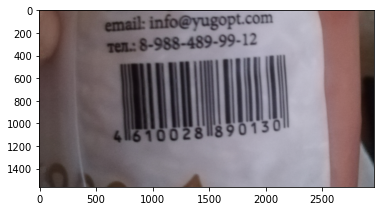

D:/BARCODES_UNPACKED/Test/Test/Images/e7979371f1f2b49b63b33d625e51d2d5.png


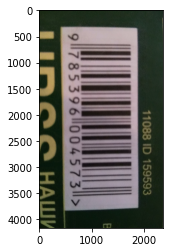

D:/BARCODES_UNPACKED/Test/Test/Images/e8c43ae814911c4622987809d4850336.png


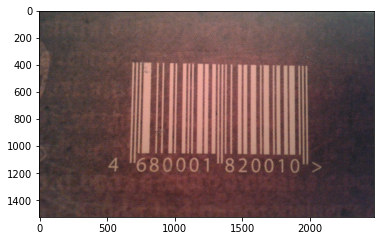

D:/BARCODES_UNPACKED/Test/Test/Images/eddb324b906534e158177f022a1ca3b4.png


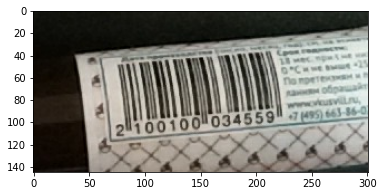

D:/BARCODES_UNPACKED/Test/Test/Images/f7c811258e32c7150ff454bf419e8bc7.png


In [12]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        image = Image.open(filepath)
        res = decode(image, symbols=[ZBarSymbol.EAN13])
        try:
            decoded_num = int(res[0][0])
            answer.loc[answer["img"] == filename, "num"] = decoded_num
        except:
            unknown += 1
            image = Image.open(filepath)
            plt.imshow(image)
            plt.show()
            print(filepath)

In [64]:
image = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png")
res = decode(image, symbols=[ZBarSymbol.EAN13])
res

[]

In [13]:
assert unknown == len(answer[answer["num"] == 404])

In [14]:
answer

img            num   x1   y1   x2   y2  \
0   f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404  404  404   
1   a154b624c06072da1a01c97ebc3894c1.png  4607016245676  404  404  404  404   
2   749003091876fc58be69db54bbaae8f1.png  4602224079426  404  404  404  404   
3   560ca4ac1260313eb5979140c4f9ef31.png  9185947237250  404  404  404  404   
4   2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404  404  404  404   
..                                   ...            ...  ...  ...  ...  ...   
94  bf547f52301ee51df5faf1a6dc678740.png            404  404  404  404  404   
95  d7d7c5f9109aa31aff407eeab054bfc7.png            404  404  404  404  404   
96  d6230eb6dc78728c09024eb674c427ef.png  4810023000156  404  404  404  404   
97  f534d421c7e36d6133a5e9031a7e2dd5.png  4610012044877  404  404  404  404   
98  2e83c9d27bbdb98505c76a19f19cb9d7.png  4740018135306  404  404  404  404   

     x3   y3   x4   y4  modules  
0   404  404  404  404      404  
1   404  404  404  404      404  
2   404  404  404  404      404  
3   404  404  404  404      404  
4   404  404  404  404      404  
..  ...  ...  ...  ...      ...  
94  404  404  404  404      404  
95  404  404  404  404      404  
96  404  404  404  404      404  
97  404  404  404  404      404  
98  404  404  404  404      404  

[99 rows x 11 columns]

In [15]:
answer.to_csv("new_answer.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("new_answer.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404.1  404.2  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676  404    404    404   
1  749003091876fc58be69db54bbaae8f1.png  4602224079426  404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png  9185947237250  404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404    404    404   
4  589b454c920322816d8df0494cb07bba.png  8185881847783  404    404    404   

   404.3  404.4  404.5  404.6  404.7  404.8  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [16]:
evaluate(gt_path="markup.csv", answer_path="new_answer.csv")

Checking answer (new_answer.csv) against markup(markup.csv)
recognition_accuracy= 0.6565656565656566
detection_iou= 0.0
score= 0.4267676767676768


## Python ZXing

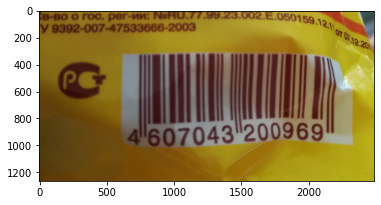

In [29]:
image = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png")
plt.imshow(image)

In [30]:
from pyzxing import BarCodeReader

reader = BarCodeReader()
results = reader.decode('D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png')
print(results)

[{'filename': b'file:///D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png', 'format': b'EAN_13', 'type': b'PRODUCT', 'raw': b'4607043200969', 'parsed': b'4607043200969', 'points': [(770.5, 572.0), (2179.0, 572.0)]}]


In [31]:
int(results[0]['parsed'])

4607043200969

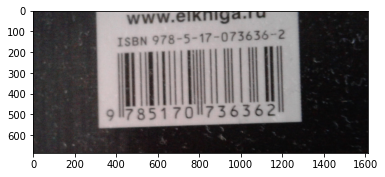

In [190]:
image = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/e5aa00f9b8978a02f20e4ca017bb6d80.png")
plt.imshow(image)

In [191]:
results = reader.decode('D:/BARCODES_UNPACKED/Test/Test/Images/e5aa00f9b8978a02f20e4ca017bb6d80.png')
results

[{'filename': b'file:///D:/BARCODES_UNPACKED/Test/Test/Images/e5aa00f9b8978a02f20e4ca017bb6d80.png',
  'format': b'EAN_13',
  'type': b'ISBN',
  'raw': b'9785170736362',
  'parsed': b'9785170736362',
  'points': [(422.0, 316.0), (1188.5, 316.0)]}]

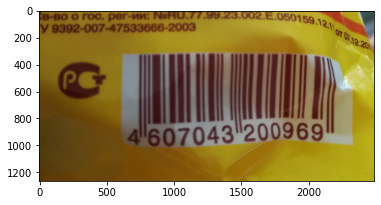

In [180]:
image = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png")
plt.imshow(image)

In [181]:
results = reader.decode('D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png')
results

[{'filename': b'file:///D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png',
  'format': b'EAN_13',
  'type': b'PRODUCT',
  'raw': b'4607043200969',
  'parsed': b'4607043200969',
  'points': [(770.5, 572.0), (2179.0, 572.0)]}]

In [142]:
if 'parsed' in results[0]:
    print(1)

1


In [23]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

In [24]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        results = reader.decode(filepath)
        try:
            decoded_num = int(results[0]['parsed'])
            answer.loc[answer["img"] == filename, "num"] = decoded_num
        except:
            unknown += 1
            print(filepath)

D:/BARCODES_UNPACKED/Test/Test/Images/00f3d3d8b60ef559304ff51cadaf4fb1.png
D:/BARCODES_UNPACKED/Test/Test/Images/10c9065a00b9bea9b741208b2679cf76.png
D:/BARCODES_UNPACKED/Test/Test/Images/157a4b17084b43ef3b572dd7267e76d0.png
D:/BARCODES_UNPACKED/Test/Test/Images/1b40467bc7b1623a8c957719fcf61b54.png
D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png
D:/BARCODES_UNPACKED/Test/Test/Images/2de6d574d39d2c8fcb700ab62fa25e94.png
D:/BARCODES_UNPACKED/Test/Test/Images/37de452d05e9ecbed02a3966a1fa71b2.png
D:/BARCODES_UNPACKED/Test/Test/Images/40ed826ebe0916f70999c831fc078faf.png
D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png
D:/BARCODES_UNPACKED/Test/Test/Images/4391a02a103037aa5b77e676f48213d8.png
D:/BARCODES_UNPACKED/Test/Test/Images/48e4ee3749f5e786d2160d5081a4640f.png
D:/BARCODES_UNPACKED/Test/Test/Images/4de809d33c56a83ae75f4ed10a027998.png
D:/BARCODES_UNPACKED/Test/Test/Images/4e19d13913850c634fa6ca54850b6914.png
D:/BARCODES_UNPACKED/Test

In [25]:
assert unknown == len(answer[answer["num"] == 404])

AssertionError: 

In [26]:
print(unknown, len(answer[answer["num"] == 404]))

47 46


In [27]:
answer.to_csv("new_answer2.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("new_answer2.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png            404  404.1  404.2  404.3  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676    404    404    404   
1  749003091876fc58be69db54bbaae8f1.png            404    404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png  9785947231250    404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766    404    404    404   
4  589b454c920322816d8df0494cb07bba.png  9785981241123    404    404    404   

   404.4  404.5  404.6  404.7  404.8  404.9  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [28]:
evaluate(gt_path="markup.csv", answer_path="new_answer2.csv")

Checking answer (new_answer2.csv) against markup(markup.csv)
recognition_accuracy= 0.5151515151515151
detection_iou= 0.0
score= 0.33484848484848484


## OpenCV2

In [44]:
bardet = cv2.barcode_BarcodeDetector()
img = cv2.imread("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png")
bardet.detectAndDecode(img)
# ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(img)

(True,
 ('4607043200969',),
 (2,),
 array([[[ 579.07837,  791.5106 ],
         [ 584.36304,  408.89084],
         [2329.1091 ,  432.98938],
         [2323.8245 ,  815.60913]]], dtype=float32))

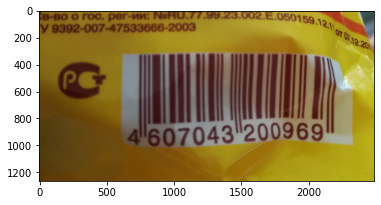

In [70]:
img = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png")
plt.imshow(img)

In [156]:
ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png"))
print(decoded_info[0])

4607043200969


In [157]:
corners = corners[0]
print(corners)

[[ 579.07837  791.5106 ]
 [ 584.36304  408.89084]
 [2329.1091   432.98938]
 [2323.8245   815.60913]]


In [158]:
corners_flattened = [item for sublist in corners for item in sublist]
corners_flattened

[579.07837,
 791.5106,
 584.36304,
 408.89084,
 2329.1091,
 432.98938,
 2323.8245,
 815.60913]

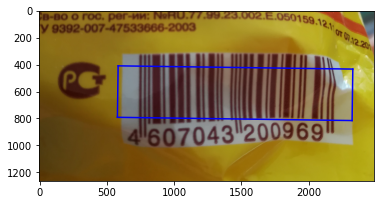

In [60]:
img = Image.open("D:/BARCODES_UNPACKED/Test/Test/Images/021e9179bdd3287d873de5208535b4a7.png")
plt.imshow(img)
plt.plot(corners[:2, 0], corners[:2, 1], color='b')
plt.plot(corners[2:, 0], corners[2:, 1], color='b')
plt.plot(corners[1:3, 0], corners[1:3, 1], color='b')
plt.plot([corners[0][0], corners[3][0]], [corners[0][1], corners[3][1]], color='b')
plt.show()

In [6]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

In [9]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        img = cv2.imread(filepath)
        ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(img)
        if ok == True:
            decoded_num = decoded_info[0]
            answer.loc[answer["img"] == filename, "num"] = decoded_num
        else:
            unknown += 1
            print(filepath)

D:/BARCODES_UNPACKED/Test/Test/Images/10c9065a00b9bea9b741208b2679cf76.png
D:/BARCODES_UNPACKED/Test/Test/Images/157a4b17084b43ef3b572dd7267e76d0.png
D:/BARCODES_UNPACKED/Test/Test/Images/19b01a2c6deeda40dbbdc6c54b7b6497.png
D:/BARCODES_UNPACKED/Test/Test/Images/1b40467bc7b1623a8c957719fcf61b54.png
D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png
D:/BARCODES_UNPACKED/Test/Test/Images/2de6d574d39d2c8fcb700ab62fa25e94.png
D:/BARCODES_UNPACKED/Test/Test/Images/2e83c9d27bbdb98505c76a19f19cb9d7.png
D:/BARCODES_UNPACKED/Test/Test/Images/36218303d390a25f042fb9844133e911.png
D:/BARCODES_UNPACKED/Test/Test/Images/40ed826ebe0916f70999c831fc078faf.png
D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png
D:/BARCODES_UNPACKED/Test/Test/Images/4391a02a103037aa5b77e676f48213d8.png
D:/BARCODES_UNPACKED/Test/Test/Images/4e19d13913850c634fa6ca54850b6914.png
D:/BARCODES_UNPACKED/Test/Test/Images/560ca4ac1260313eb5979140c4f9ef31.png
D:/BARCODES_UNPACKED/Test

In [10]:
assert unknown == len(answer[answer["num"] == 404])

In [13]:
print(unknown, len(answer))

38 99


In [11]:
answer.to_csv("new_answer_opencv.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("new_answer_opencv.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404.1  404.2  \
0  a154b624c06072da1a01c97ebc3894c1.png   676542616100  404    404    404   
1  749003091876fc58be69db54bbaae8f1.png            404  404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png            404  404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404    404    404   
4  589b454c920322816d8df0494cb07bba.png            404  404    404    404   

   404.3  404.4  404.5  404.6  404.7  404.8  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [12]:
evaluate(gt_path="markup.csv", answer_path="new_answer_opencv.csv")

Checking answer (new_answer_opencv.csv) against markup(markup.csv)
recognition_accuracy= 0.5454545454545454
detection_iou= 0.0
score= 0.35454545454545455


## All in all

In [73]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

In [74]:
from PIL import Image
from pyzbar.pyzbar import decode, ZBarSymbol
from pyzxing import BarCodeReader

reader = BarCodeReader()

bardet = cv2.barcode_BarcodeDetector()

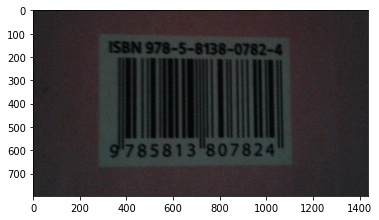

D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png


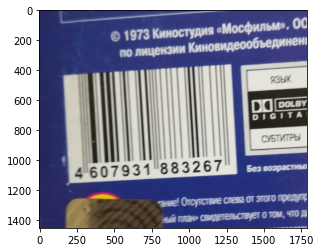

D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png


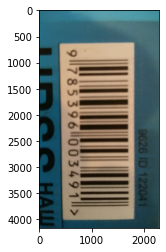

D:/BARCODES_UNPACKED/Test/Test/Images/710eb9174efd4f943aa75c79e89a5bdc.png


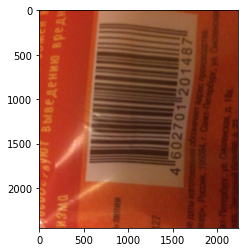

D:/BARCODES_UNPACKED/Test/Test/Images/7e56f424b1cd4515c744543907e89663.png


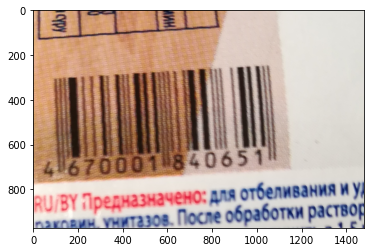

D:/BARCODES_UNPACKED/Test/Test/Images/a417bfe1b2ea0e2ac15c92db789ff500.png


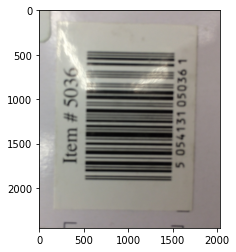

D:/BARCODES_UNPACKED/Test/Test/Images/ab30ca615e3fb75d5bcbf0b1aa663f69.png


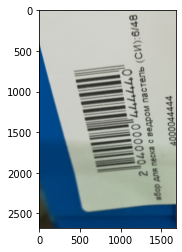

D:/BARCODES_UNPACKED/Test/Test/Images/afd709c701704672c18db8d2684e0ae6.png


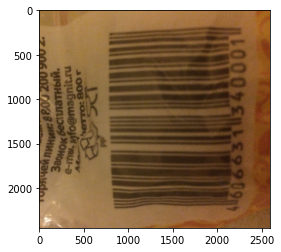

D:/BARCODES_UNPACKED/Test/Test/Images/bf547f52301ee51df5faf1a6dc678740.png


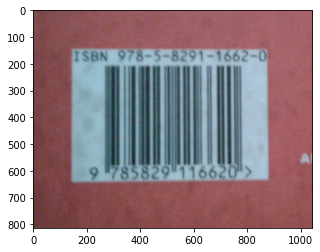

D:/BARCODES_UNPACKED/Test/Test/Images/cd82f250fa1ff45ae2eada5d91ed90a2.png


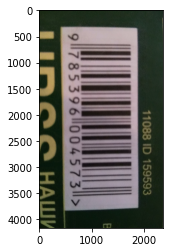

D:/BARCODES_UNPACKED/Test/Test/Images/e8c43ae814911c4622987809d4850336.png


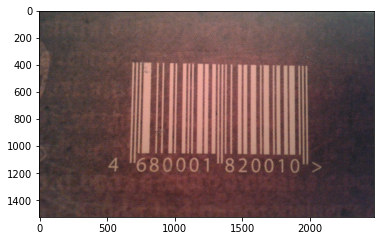

D:/BARCODES_UNPACKED/Test/Test/Images/eddb324b906534e158177f022a1ca3b4.png


In [75]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        image = Image.open(filepath)
        decoded_num = 404
        zbar_res = decode(image, symbols=[ZBarSymbol.EAN13])
        if zbar_res:
            decoded_num = int(zbar_res[0][0])
        else:
            ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread(filepath))
            if ok == True:
                decoded_num = decoded_info[0]
            else:
                results = reader.decode(filepath)
                try:
                    decoded_num = int(results[0]['parsed'])
                except:
                    unknown += 1
                    plt.imshow(image)
                    plt.show()
                    print(filepath)
        answer.loc[answer["img"] == filename, "num"] = decoded_num

In [77]:
assert unknown == len(answer[answer["num"] == 404])

In [76]:
answer.to_csv("ansamble_answer.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("ansamble_answer.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404.1  404.2  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676  404    404    404   
1  749003091876fc58be69db54bbaae8f1.png  4602224079426  404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png  9185947237250  404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404    404    404   
4  589b454c920322816d8df0494cb07bba.png  8185881847783  404    404    404   

   404.3  404.4  404.5  404.6  404.7  404.8  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [78]:
evaluate(gt_path="markup.csv", answer_path="ansamble_answer.csv")

Checking answer (ansamble_answer.csv) against markup(markup.csv)
recognition_accuracy= 0.797979797979798
detection_iou= 0.0
score= 0.5186868686868688


## All in all x2

In [91]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

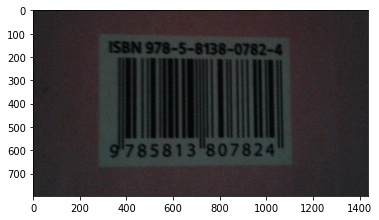

D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png


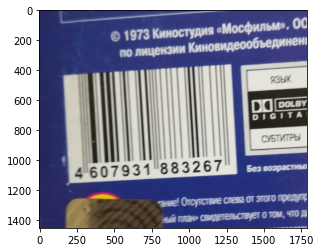

D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png


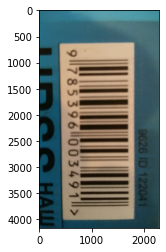

D:/BARCODES_UNPACKED/Test/Test/Images/710eb9174efd4f943aa75c79e89a5bdc.png


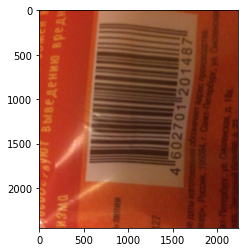

D:/BARCODES_UNPACKED/Test/Test/Images/7e56f424b1cd4515c744543907e89663.png


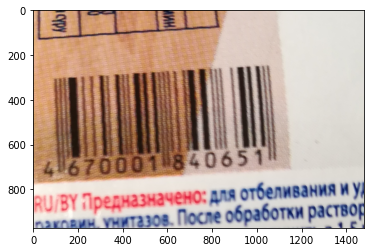

D:/BARCODES_UNPACKED/Test/Test/Images/a417bfe1b2ea0e2ac15c92db789ff500.png


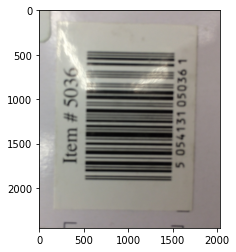

D:/BARCODES_UNPACKED/Test/Test/Images/ab30ca615e3fb75d5bcbf0b1aa663f69.png


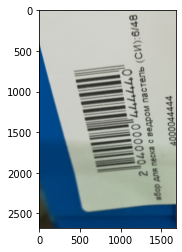

D:/BARCODES_UNPACKED/Test/Test/Images/afd709c701704672c18db8d2684e0ae6.png


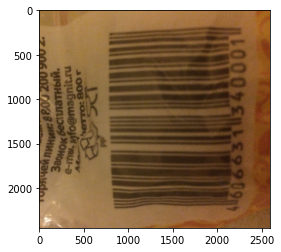

D:/BARCODES_UNPACKED/Test/Test/Images/bf547f52301ee51df5faf1a6dc678740.png


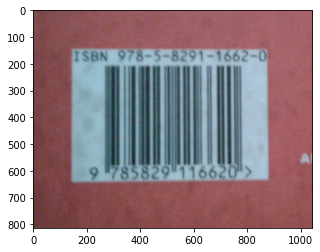

D:/BARCODES_UNPACKED/Test/Test/Images/cd82f250fa1ff45ae2eada5d91ed90a2.png


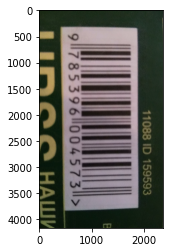

D:/BARCODES_UNPACKED/Test/Test/Images/e8c43ae814911c4622987809d4850336.png


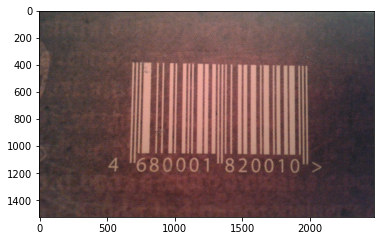

D:/BARCODES_UNPACKED/Test/Test/Images/eddb324b906534e158177f022a1ca3b4.png


In [92]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        image = Image.open(filepath)
        decoded_num = 404
        results = reader.decode(filepath)
        if 'parsed' in results[0]:
            decoded_num = int(results[0]['parsed'])
        else:
            zbar_res = decode(image, symbols=[ZBarSymbol.EAN13])
            if zbar_res:
                decoded_num = int(zbar_res[0][0])
            else:
                ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread(filepath))
                if ok == True:
                    decoded_num = decoded_info[0]
                else:
                    unknown += 1
                    plt.imshow(image)
                    plt.show()
                    print(filepath)
        answer.loc[answer["img"] == filename, "num"] = decoded_num

In [93]:
assert unknown == len(answer[answer["num"] == 404])

In [94]:
answer.to_csv("ansamble_answer2.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("ansamble_answer2.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404.1  404.2  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676  404    404    404   
1  749003091876fc58be69db54bbaae8f1.png  4602224079426  404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png  9785947231250  404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404    404    404   
4  589b454c920322816d8df0494cb07bba.png  9785981241123  404    404    404   

   404.3  404.4  404.5  404.6  404.7  404.8  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [95]:
evaluate(gt_path="markup.csv", answer_path="ansamble_answer2.csv")

Checking answer (ansamble_answer2.csv) against markup(markup.csv)
recognition_accuracy= 0.8282828282828283
detection_iou= 0.0
score= 0.5383838383838384


## All in all x2 with alignments

In [126]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

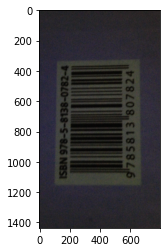

D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png


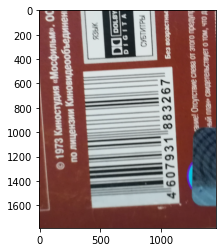

D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png


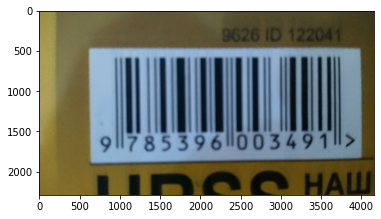

D:/BARCODES_UNPACKED/Test/Test/Images/710eb9174efd4f943aa75c79e89a5bdc.png


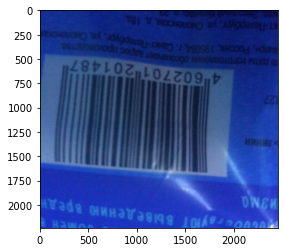

D:/BARCODES_UNPACKED/Test/Test/Images/7e56f424b1cd4515c744543907e89663.png


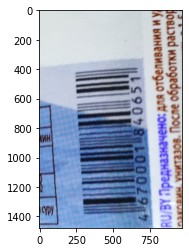

D:/BARCODES_UNPACKED/Test/Test/Images/a417bfe1b2ea0e2ac15c92db789ff500.png


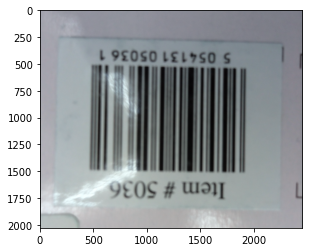

D:/BARCODES_UNPACKED/Test/Test/Images/ab30ca615e3fb75d5bcbf0b1aa663f69.png


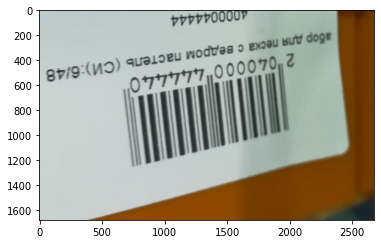

D:/BARCODES_UNPACKED/Test/Test/Images/afd709c701704672c18db8d2684e0ae6.png


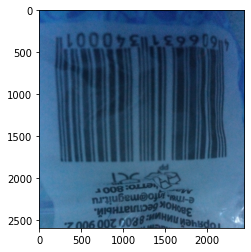

D:/BARCODES_UNPACKED/Test/Test/Images/bf547f52301ee51df5faf1a6dc678740.png


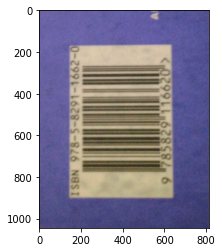

D:/BARCODES_UNPACKED/Test/Test/Images/cd82f250fa1ff45ae2eada5d91ed90a2.png


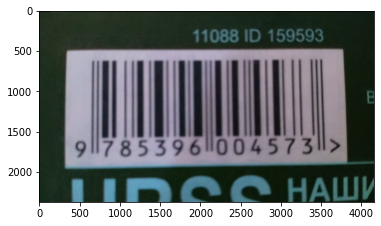

D:/BARCODES_UNPACKED/Test/Test/Images/e8c43ae814911c4622987809d4850336.png


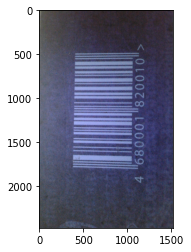

D:/BARCODES_UNPACKED/Test/Test/Images/eddb324b906534e158177f022a1ca3b4.png


In [127]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        image = cv2.imread(filepath)
        decoded_num = 404
        results = reader.decode(filepath)
        if 'parsed' in results[0]:
            decoded_num = int(results[0]['parsed'])
        else:
            for i in range(3):
                image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE)
                cv2.imwrite("tmp.png", image)
                results = reader.decode("tmp.png")
                if 'parsed' in results[0]:
                    decoded_num = int(results[0]['parsed'])
                    break
            else:
                zbar_res = decode(Image.open(filepath), symbols=[ZBarSymbol.EAN13])
                if zbar_res:
                    decoded_num = int(zbar_res[0][0])
                else:
                    ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread(filepath))
                    if ok == True:
                        decoded_num = decoded_info[0]
                    else:
                        unknown += 1
                        plt.imshow(image)
                        plt.show()
                        print(filepath)
        answer.loc[answer["img"] == filename, "num"] = decoded_num

In [128]:
assert unknown == len(answer[answer["num"] == 404])

In [129]:
answer.to_csv("ansamble_answer3.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("ansamble_answer3.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404.1  404.2  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676  404    404    404   
1  749003091876fc58be69db54bbaae8f1.png  4602224079426  404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png  9785947231250  404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404    404    404   
4  589b454c920322816d8df0494cb07bba.png  9785981241123  404    404    404   

   404.3  404.4  404.5  404.6  404.7  404.8  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [130]:
evaluate(gt_path="markup.csv", answer_path="ansamble_answer3.csv")

Checking answer (ansamble_answer3.csv) against markup(markup.csv)
recognition_accuracy= 0.8282828282828283
detection_iou= 0.0
score= 0.5383838383838384


## All in all x3 with alignments

In [131]:
answer = pd.read_csv("answer.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

In [132]:
def process(filepath):
        image = Image.open(filepath)
        decoded_num = 404
        results = reader.decode(filepath)
        if 'parsed' in results[0]:
            decoded_num = int(results[0]['parsed'])
        else:
            zbar_res = decode(image, symbols=[ZBarSymbol.EAN13])
            if zbar_res:
                decoded_num = int(zbar_res[0][0])
            else:
                ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread(filepath))
                if ok == True:
                    decoded_num = decoded_info[0]
        return decoded_num

In [133]:
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        for i in range(4):
            decoded_num = process(filepath)
            if decoded_num == 404:
                image = cv2.imread(filepath)
                image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE)
                cv2.imwrite("tmp.png", image)
                filepath = "tmp.png"
            else:
                answer.loc[answer["img"] == filename, "num"] = decoded_num
                break

In [135]:
answer.to_csv("ansamble_answer4.csv", header=False, index=False, encoding="utf_16")

new_answer = pd.read_csv("ansamble_answer4.csv", encoding="utf_16")
new_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  404  404.1  404.2  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676  404    404    404   
1  749003091876fc58be69db54bbaae8f1.png  4602224079426  404    404    404   
2  560ca4ac1260313eb5979140c4f9ef31.png  9785947231250  404    404    404   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  404    404    404   
4  589b454c920322816d8df0494cb07bba.png  9785981241123  404    404    404   

   404.3  404.4  404.5  404.6  404.7  404.8  
0    404    404    404    404    404    404  
1    404    404    404    404    404    404  
2    404    404    404    404    404    404  
3    404    404    404    404    404    404  
4    404    404    404    404    404    404

In [136]:
evaluate(gt_path="markup.csv", answer_path="ansamble_answer4.csv")

Checking answer (ansamble_answer4.csv) against markup(markup.csv)
recognition_accuracy= 0.8282828282828283
detection_iou= 0.0
score= 0.5383838383838384


## Final

In [27]:
from PIL import Image
from pyzbar.pyzbar import decode, ZBarSymbol
from pyzxing import BarCodeReader

reader = BarCodeReader()

bardet = cv2.barcode_BarcodeDetector()

In [28]:
answer = pd.read_csv("markup.csv", encoding="utf_16_le")
answer.columns = ["img", "num", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "modules"]
answer.iloc[:, 1:] = 404
answer.head()

img  num   x1   y1   x2   y2   x3   y3  \
0  f9bf5d96a0cf5d64aac4eb5806554224.png  404  404  404  404  404  404  404   
1  a154b624c06072da1a01c97ebc3894c1.png  404  404  404  404  404  404  404   
2  749003091876fc58be69db54bbaae8f1.png  404  404  404  404  404  404  404   
3  560ca4ac1260313eb5979140c4f9ef31.png  404  404  404  404  404  404  404   
4  2bc877416a54aea8a94227ce9d1e5d1f.png  404  404  404  404  404  404  404   

    x4   y4  modules  
0  404  404      404  
1  404  404      404  
2  404  404      404  
3  404  404      404  
4  404  404      404

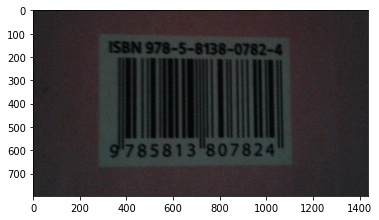

D:/BARCODES_UNPACKED/Test/Test/Images/1cd72c7dcf77e1b8a401c0a7b41573c8.png


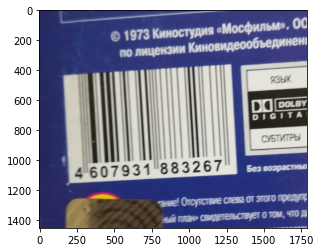

D:/BARCODES_UNPACKED/Test/Test/Images/429394b77b7a164916bbf2a8a824f30e.png


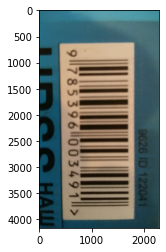

D:/BARCODES_UNPACKED/Test/Test/Images/710eb9174efd4f943aa75c79e89a5bdc.png


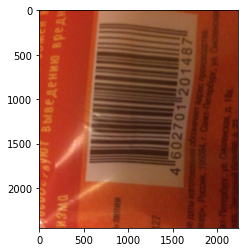

D:/BARCODES_UNPACKED/Test/Test/Images/7e56f424b1cd4515c744543907e89663.png


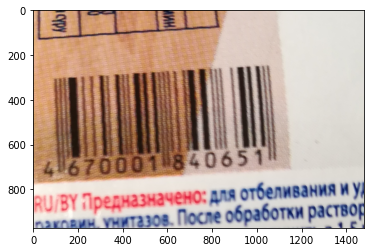

D:/BARCODES_UNPACKED/Test/Test/Images/a417bfe1b2ea0e2ac15c92db789ff500.png


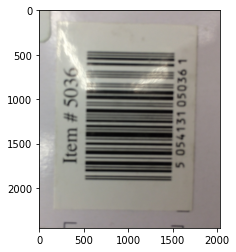

D:/BARCODES_UNPACKED/Test/Test/Images/ab30ca615e3fb75d5bcbf0b1aa663f69.png


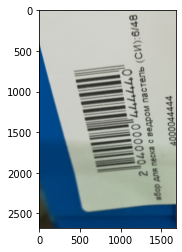

D:/BARCODES_UNPACKED/Test/Test/Images/afd709c701704672c18db8d2684e0ae6.png


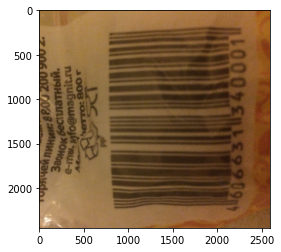

D:/BARCODES_UNPACKED/Test/Test/Images/bf547f52301ee51df5faf1a6dc678740.png


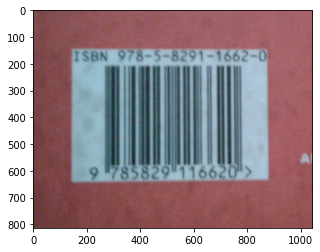

D:/BARCODES_UNPACKED/Test/Test/Images/cd82f250fa1ff45ae2eada5d91ed90a2.png


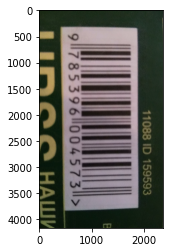

D:/BARCODES_UNPACKED/Test/Test/Images/e8c43ae814911c4622987809d4850336.png


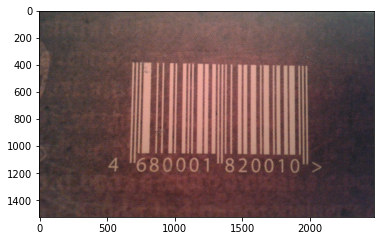

D:/BARCODES_UNPACKED/Test/Test/Images/eddb324b906534e158177f022a1ca3b4.png


In [29]:
unknown = 0
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        image = Image.open(filepath)
        decoded_num = 404
        results = reader.decode(filepath)
        if 'parsed' in results[0]:
            decoded_num = int(results[0]['parsed'])
        else:
            zbar_res = decode(image, symbols=[ZBarSymbol.EAN13])
            if zbar_res:
                decoded_num = int(zbar_res[0][0])
            else:
                ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread(filepath))
                if ok == True:
                    decoded_num = decoded_info[0]
                else:
                    unknown += 1
                    plt.imshow(image)
                    plt.show()
                    print(filepath)
        answer.loc[answer["img"] == filename, "num"] = decoded_num

In [30]:
assert unknown == len(answer[answer["num"] == 404])

In [31]:
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        ok, decoded_info, decoded_type, corners = bardet.detectAndDecode(cv2.imread(filepath))
        if ok == True:
            corners_flattened = [item for sublist in corners[0] for item in sublist]
            answer.loc[answer["img"] == filename, "x1":"y4"] = list(map(int, corners_flattened))

In [32]:
for dirname, _, filenames in os.walk("D:/BARCODES_UNPACKED/Test/Test/Images"):
    for filename in filenames:
        filepath = dirname + "/" + filename
        image = Image.open(filepath)
        zbar_res = decode(image, symbols=[ZBarSymbol.EAN13])
        # rect=Rect(left=743, top=496, width=1463, height=287
        try:
            if zbar_res and answer.loc[answer["img"] == filename, "x1"].item() == 404:
                x, y, width, height = zbar_res[0].rect
                answer.loc[answer["img"] == filename, "x1":"y1"] = [x, y]
                answer.loc[answer["img"] == filename, "x2":"y2"] = [x + width, y]
                answer.loc[answer["img"] == filename, "x3":"y3"] = [x + width, y + height]
                answer.loc[answer["img"] == filename, "x4":"y4"] = [x, y + height]
        except:
            pass

In [33]:
answer.to_csv("answer.csv", header=False, index=False, encoding="utf_16")

final_answer = pd.read_csv("answer.csv", encoding="utf_16")
final_answer.head()

f9bf5d96a0cf5d64aac4eb5806554224.png  8594015301013  485  1070   556  423  \
0  a154b624c06072da1a01c97ebc3894c1.png  4607016245676  500   918   440  518   
1  749003091876fc58be69db54bbaae8f1.png  4602224079426  529   441  1552  441   
2  560ca4ac1260313eb5979140c4f9ef31.png  9785947231250  554   316  1119  316   
3  2bc877416a54aea8a94227ce9d1e5d1f.png  9785469005766  409   696   401  304   
4  589b454c920322816d8df0494cb07bba.png  9785981241123  494   279   843  279   

   1961   577  1891  1224  404  
0  1664   334  1724   734  404  
1  1552   571   529   571  404  
2  1119   661   554   661  404  
3  1421   284  1429   676  404  
4   843  1397   494  1397  404

In [34]:
evaluate(gt_path="markup.csv", answer_path="answer.csv")

Checking answer (answer.csv) against markup(markup.csv)
recognition_accuracy= 0.8282828282828283
detection_iou= 0.5538900482386065
score= 0.7322453552673507
